In [ ]:
# importing required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Load churn data set
churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Read the contents of the data
churn_data


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
#Quantity of data set
churn_data.shape

(7043, 21)

The company in the dataset belongs to the telecomm sector.

In [ ]:
#Statistics of the numerical features
churn_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
#dataset type description
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset has three numerical quantities.


### DATA PREPROCESSING

In [ ]:
#the customerId is a random number+alphabets which is irrelevant for our churn prediction analysis
churn_data = churn_data.drop('customerID', axis=1)

In [ ]:
# check for any missing or null data in the dataset
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#print the first 5 rows
churn_data.head(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# the columns of the dataset
columns  = churn_data.columns

In [ ]:
# The rows of the dataset
rows = churn_data.values

#### 1.DATA ENCODING

In [ ]:
# t stands for transformend data, did so for ease of ML modelling
churn_data_t = churn_data.copy()

In [ ]:
#importing skelearn library to encode the data
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
#The data is encoded
encode = LabelEncoder()
for column in columns:
  churn_data_t[column] = encode.fit_transform(churn_data_t[column])

In [ ]:
#The transposed data is being displayed
churn_data_t.T

0     1     2     3     4     5     6     7     8     9     \
gender               0     1     1     1     0     0     1     0     0     1   
SeniorCitizen        0     0     0     0     0     0     0     0     0     0   
Partner              1     0     0     0     0     0     0     0     1     0   
Dependents           0     0     0     0     0     0     1     0     0     1   
tenure               1    34     2    45     2     8    22    10    28    62   
PhoneService         0     1     1     0     1     1     1     0     1     1   
MultipleLines        1     0     0     1     0     2     2     1     2     0   
InternetService      0     0     0     0     1     1     1     0     1     0   
OnlineSecurity       0     2     2     2     0     0     0     2     0     2   
OnlineBackup         2     0     2     0     0     0     2     0     0     2   
DeviceProtection     0     2     0     2     0     2     0     0     2     0   
TechSupport          0     0     0     2     0     0     0     0     2     0   
StreamingTV          0     0     0     0     0     2     2     0     2     0   
StreamingMovies      0     0     0     0     0     2     0     0     2     0   
Contract             0     1     0     1     0     0     0     0     0     1   
PaperlessBilling     1     0     1     0     1     1     1     0     1     0   
PaymentMethod        2     3     3     0     2     2     1     3     2     0   
MonthlyCharges     142   498   436   266   729  1274  1075   140  1371   482   
TotalCharges      2505  1466   157  1400   925  6104  1550  2609  2646  3022   
Churn                0     0     1     0     1     1     0     0     1     0   

                  ...  7033  7034  7035  7036  7037  7038  7039  7040  7041  \
gender            ...     1     0     1     0     0     1     0     0     1   
SeniorCitizen     ...     0     0     0     0     0     0     0     0     1   
Partner           ...     0     0     0     0     0     1     1     1     1   
Dependents        ...     0     0     0     0     0     1     1     1     0   
tenure            ...    38    67    19    12    72    24    72    11     4   
PhoneService      ...     1     1     1     0     1     1     1     0     1   
MultipleLines     ...     0     2     0     1     0     2     2     1     2   
InternetService   ...     1     1     1     0     2     0     1     0     1   
OnlineSecurity    ...     0     2     0     0     1     2     0     2     0   
OnlineBackup      ...     0     2     0     2     1     0     2     0     0   
DeviceProtection  ...     0     2     0     2     1     2     2     0     0   
TechSupport       ...     0     0     0     2     1     2     0     0     0   
StreamingTV       ...     0     2     2     2     1     2     2     0     0   
StreamingMovies   ...     0     0     0     2     1     2     2     0     0   
Contract          ...     0     0     0     1     2     1     1     0     0   
PaperlessBilling  ...     1     1     1     0     1     1     1     1     1   
PaymentMethod     ...     1     1     0     2     0     3     1     2     3   
MonthlyCharges    ...   705  1335   874   556    52   991  1340   137   795   
TotalCharges      ...  2272  5431   892  5741   770  1597  5698  2994  2660   
Churn             ...     0     1     0     0     0     0     0     0     1   

                  7042  
gender               1  
SeniorCitizen        0  
Partner              0  
Dependents           0  
tenure              66  
PhoneService         1  
MultipleLines        0  
InternetService      1  
OnlineSecurity       2  
OnlineBackup         0  
DeviceProtection     2  
TechSupport          2  
StreamingTV          2  
StreamingMovies      2  
Contract             2  
PaperlessBilling     1  
PaymentMethod        0  
MonthlyCharges    1388  
TotalCharges      5407  
Churn                0  

[20 rows x 7043 columns]

### DATA VISUALIZATION

#### Statistical Data Description

In [ ]:
# Average Monthly Charges
avg_MC = np.mean(churn_data['MonthlyCharges'])
print("The average Monthly charges : ", round(avg_MC,2))


The average Monthly charges :  64.76


In [ ]:
# Average Tenure
avg_t = np.mean(churn_data['tenure'])
print("The average Tenure of the customers in the company : ", round(avg_t,2),"months")

The average Tenure of the customers in the company :  32.37 months


In [ ]:
# count all the similar data values and club them.
value_counts = churn_data.groupby(['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']).size().reset_index(name='count')
table = value_counts.to_markdown()

# Printing the tabular representation
print(table)


|      | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines    | InternetService   | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract       | PaperlessBilling   | PaymentMethod             |   MonthlyCharges | TotalCharges   | Churn   |   count |
|-----:|:---------|----------------:|:----------|:-------------|---------:|:---------------|:-----------------|:------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:---------------|:-------------------|:--------------------------|-----------------:|:---------------|:--------|--------:|
|    0 | Female   |               0 | No        | No           |        1 | No             | No phone service | DSL               | No                  | No                  | No                  | No                  | No      

<ipython-input-20-b001ae0ee0a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data_t['Churn'], color = "red")


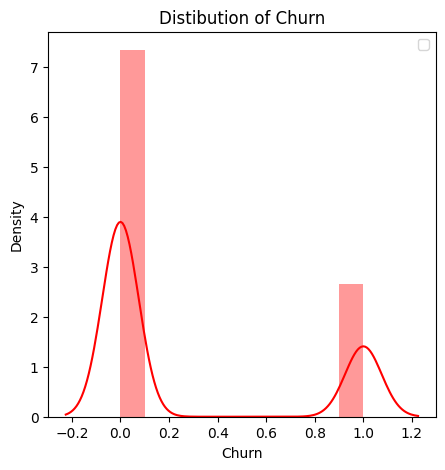

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(churn_data_t['Churn'], color = "red")
plt.title("Distibution of Churn")
plt.legend()
# 0 value on X-axis corresponds to No
# 1 value on X-axis corresponds to YES

Text(0.5, 1.0, 'Churn Classification')

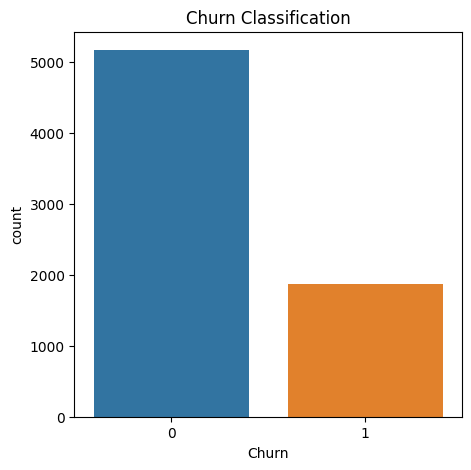

In [ ]:
# count plot for churn
plt.figure(figsize=(5, 5))
sns.countplot(data = churn_data_t, x="Churn").set_title('Churn Classification')

#### 1.Demographics

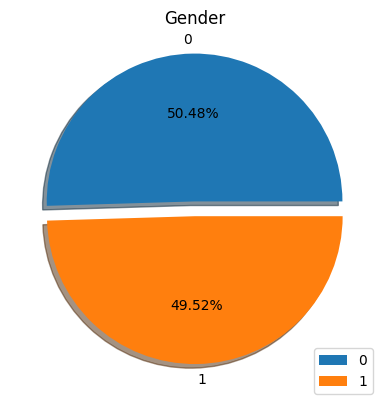

In [ ]:
#Gender representation
plt.title("Gender")
plt.pie(churn_data_t['gender'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

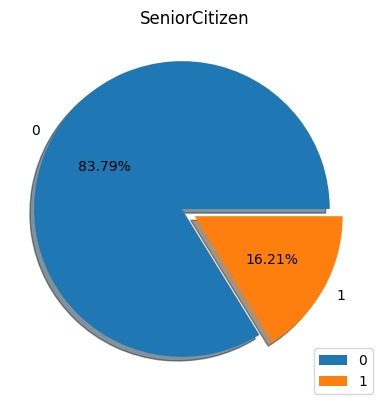

In [ ]:
#SeniorCitizen representation
plt.title("SeniorCitizen")
plt.pie(churn_data_t['SeniorCitizen'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

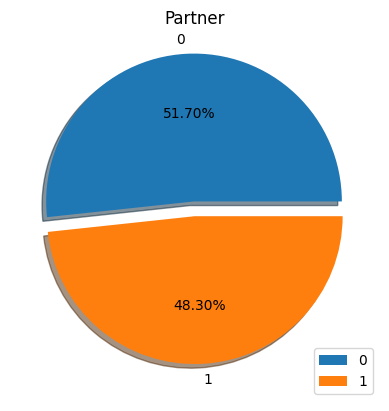

In [ ]:
#Partner representation
plt.title("Partner")
plt.pie(churn_data_t['Partner'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')


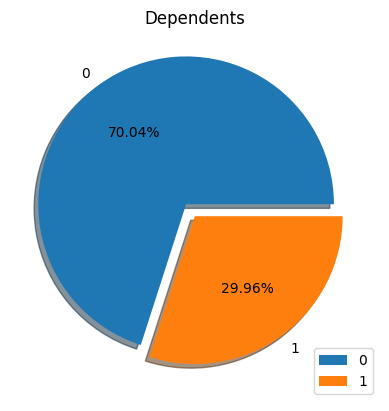

In [ ]:
#Dependents representation
plt.title("Dependents")
plt.pie(churn_data_t['Dependents'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

#### COUNT PLOTS

<Figure size 1000x800 with 0 Axes>

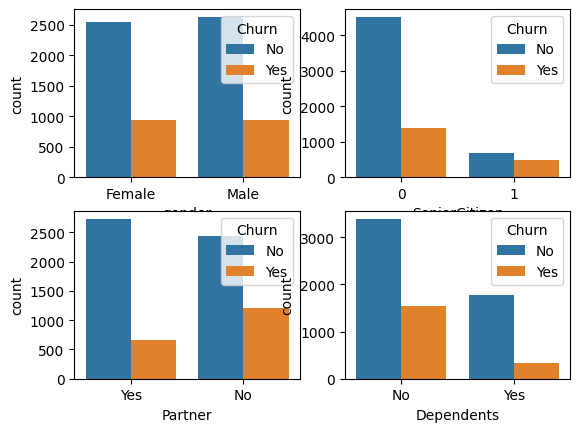

In [ ]:
#The count plot is being generated for each columns
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='gender', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='SeniorCitizen', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='Partner', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='Dependents', hue = "Churn", data = churn_data, ax=ax[1,1])

fig.show()

<Figure size 2000x4500 with 0 Axes>

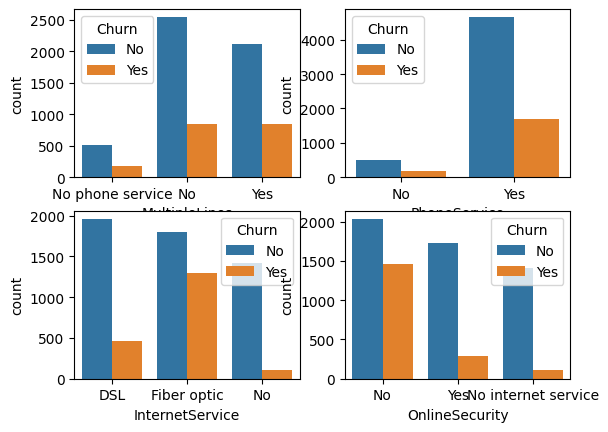

In [ ]:
# continution of count plots
plt.figure(figsize=(20,45))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='MultipleLines', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='PhoneService', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='InternetService', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='OnlineSecurity', hue = "Churn", data = churn_data, ax=ax[1,1])
fig.show()

<Figure size 1000x800 with 0 Axes>

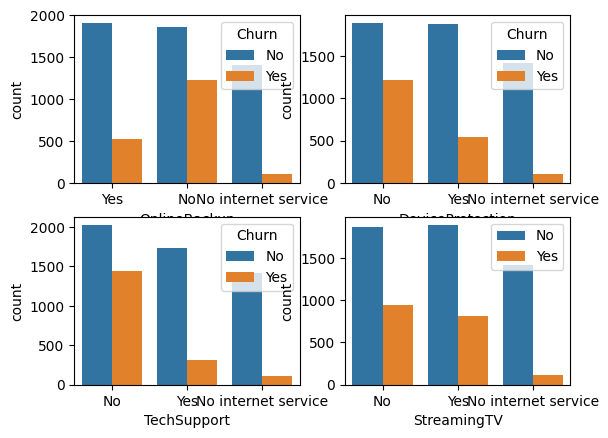

In [ ]:
# continution of count plots
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='OnlineBackup', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='DeviceProtection', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='TechSupport', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='StreamingTV', hue = "Churn", data = churn_data, ax=ax[1,1])
plt.legend()
fig.show()

<Figure size 1000x800 with 0 Axes>

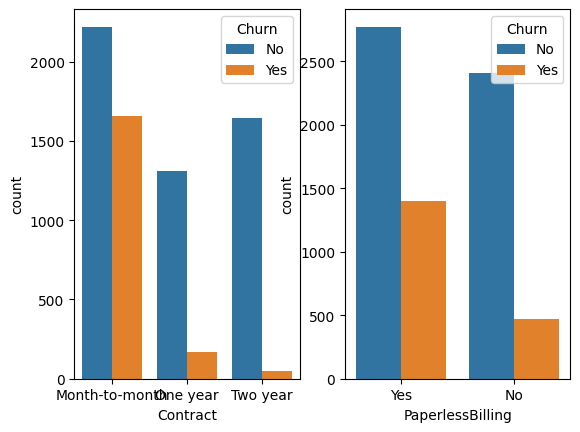

In [ ]:
# continution of count plots
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(1,2)
sns.countplot(x ='Contract', hue = "Churn", data = churn_data, ax=ax[0])
sns.countplot(x ='PaperlessBilling', hue = "Churn", data = churn_data, ax=ax[1])

fig.show()


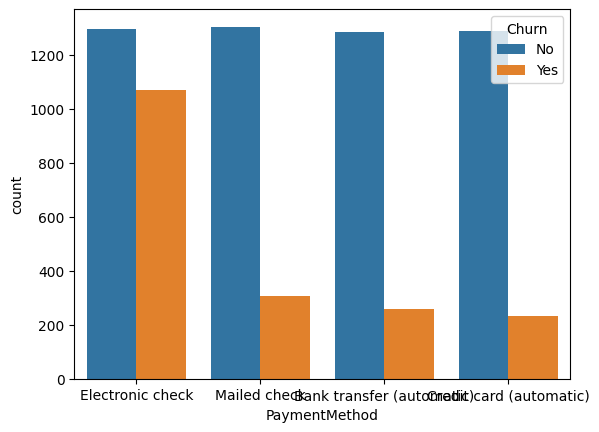

In [ ]:
# Count plot
sns.countplot(x ='PaymentMethod', hue = "Churn", data = churn_data)
plt.show()

<ipython-input-31-07d09681a654>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data_t.iloc[:, i], color='green')
<ipython-input-31-07d09681a654>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data_t.iloc[:, i], color='green')
<ipython-input-31-07d09681a654>:6: UserWarning: 

`dis

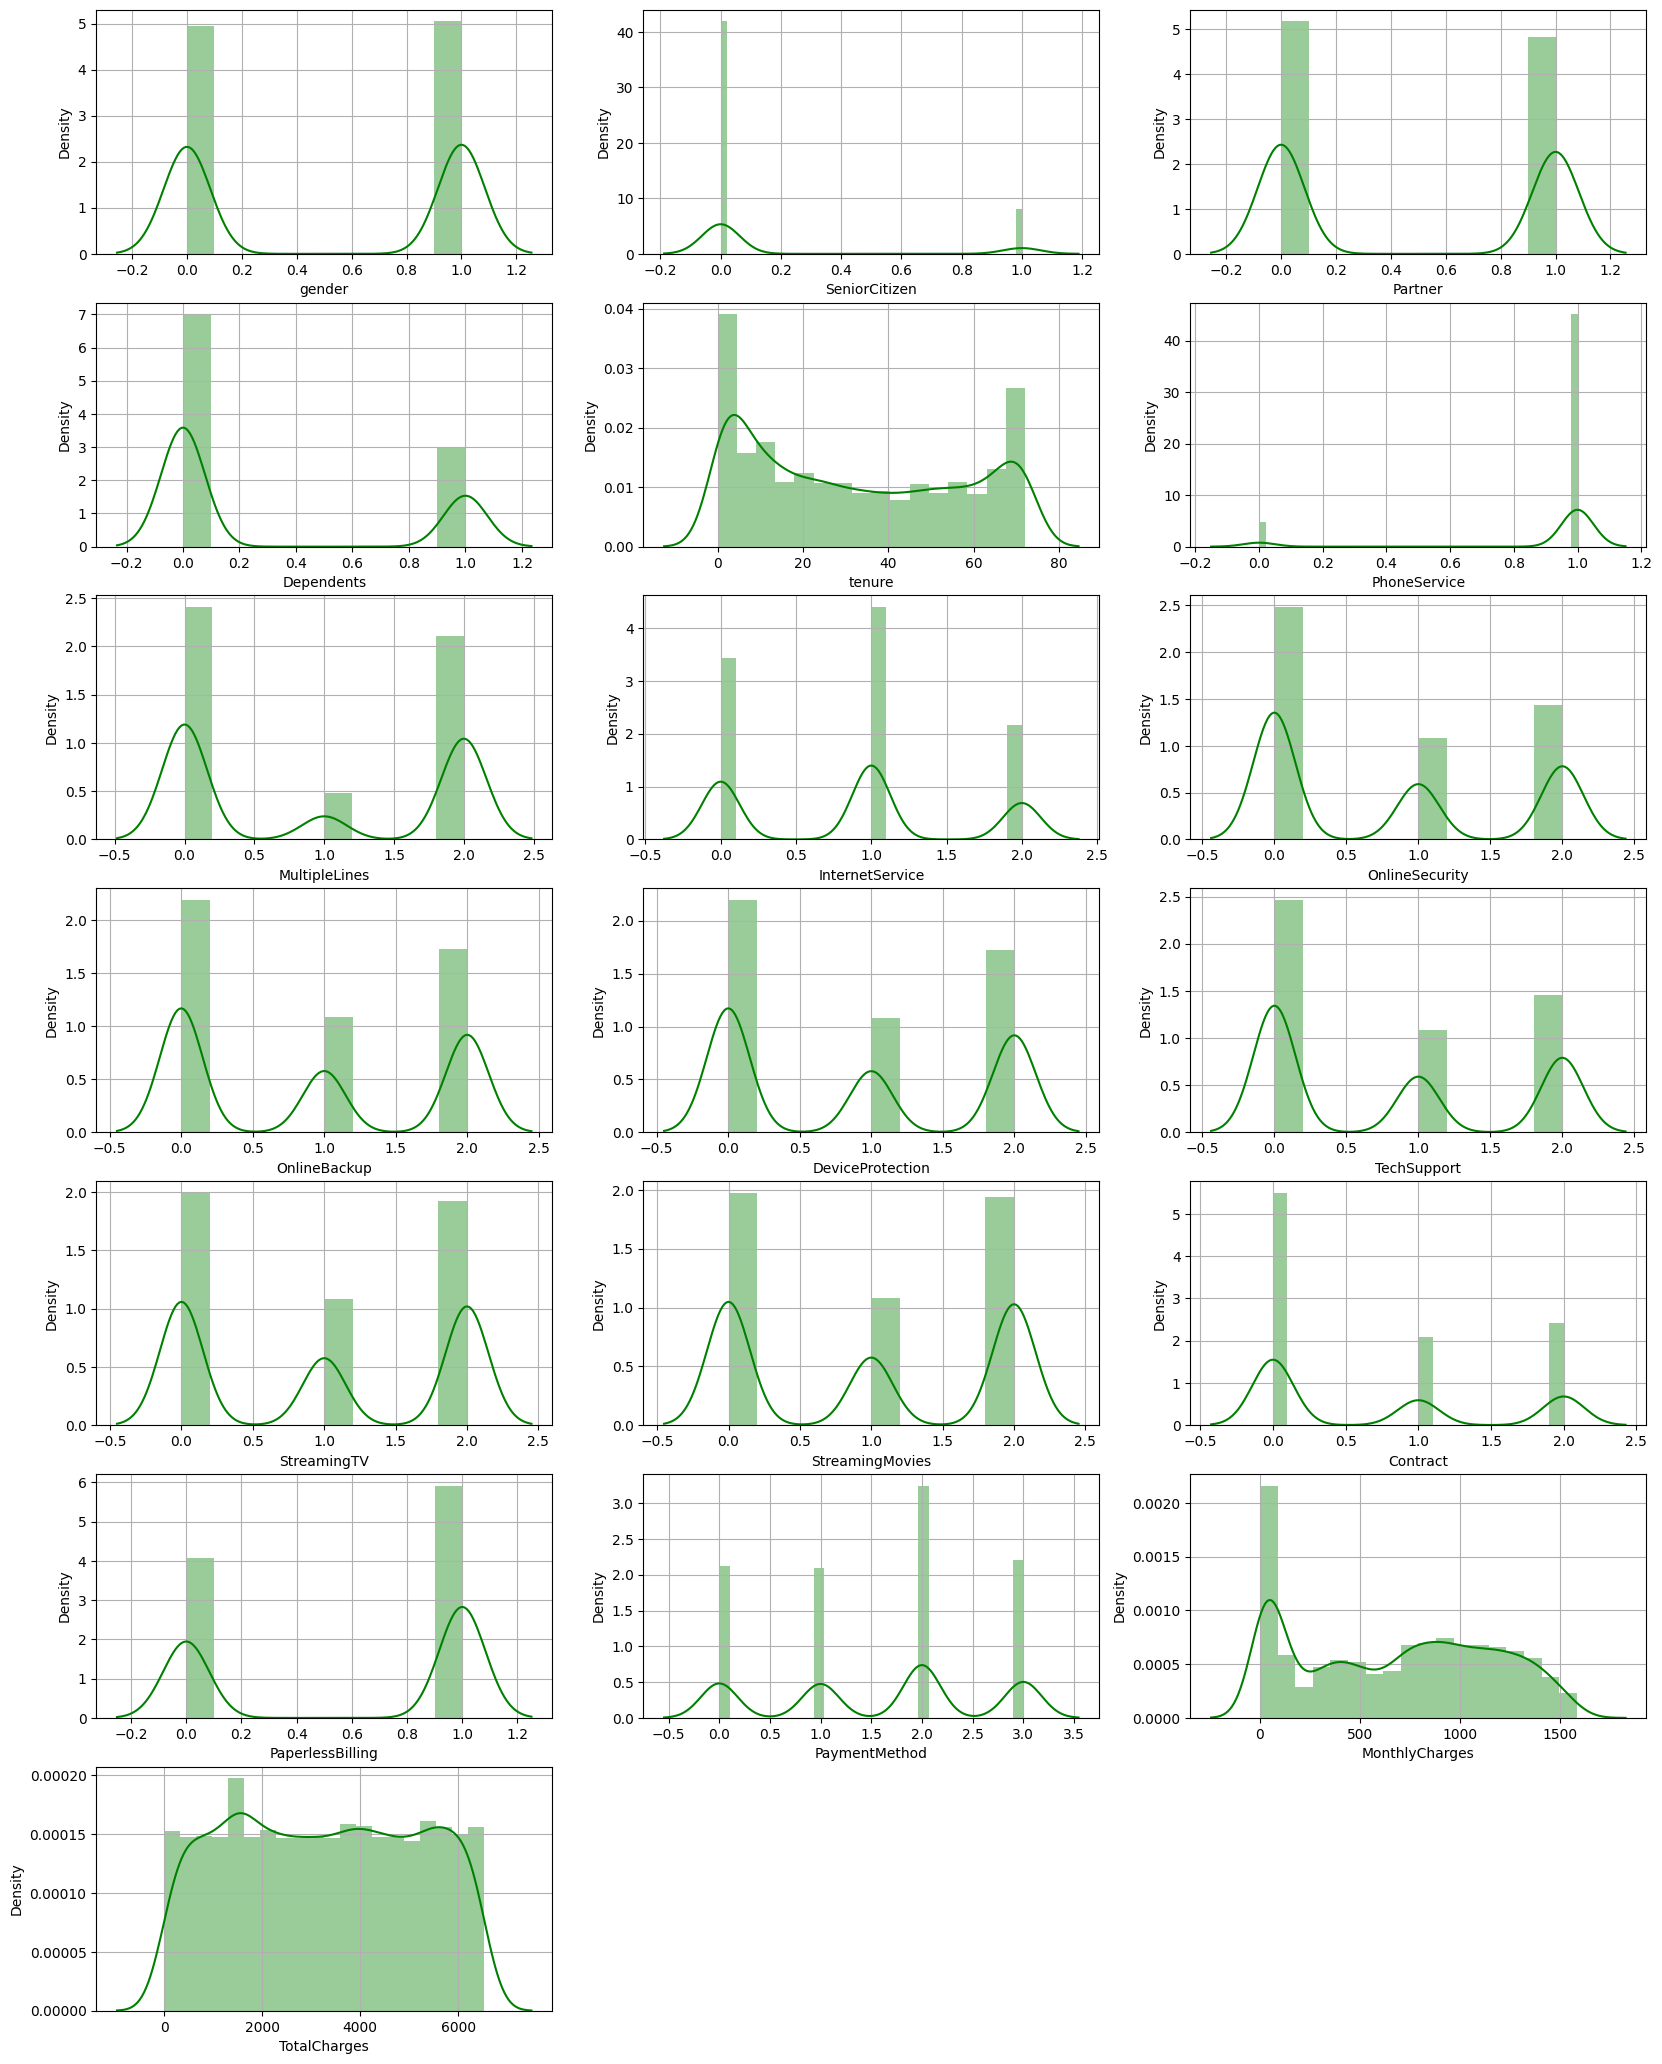

In [ ]:
#All the columns are visualized using displot
plt.figure(figsize=(20, 45))

for i in range(0, 19):
    plt.subplot(12,3,i+1)
    sns.distplot(churn_data_t.iloc[:, i], color='green')
    plt.grid()

## CORRELATION

In [ ]:
#The data is correllated and displayed
churn_corr = churn_data_t.corr()
churn_corr

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014623       0.219524  0.106501   -0.107507  0.268133   
TotalCharges     -0.005291       0.037653  0.059568   -0.009572  0.158523   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.271209       0.444580        -0.244965   
TotalCharges          0.083195       0.114955        -0.055724   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

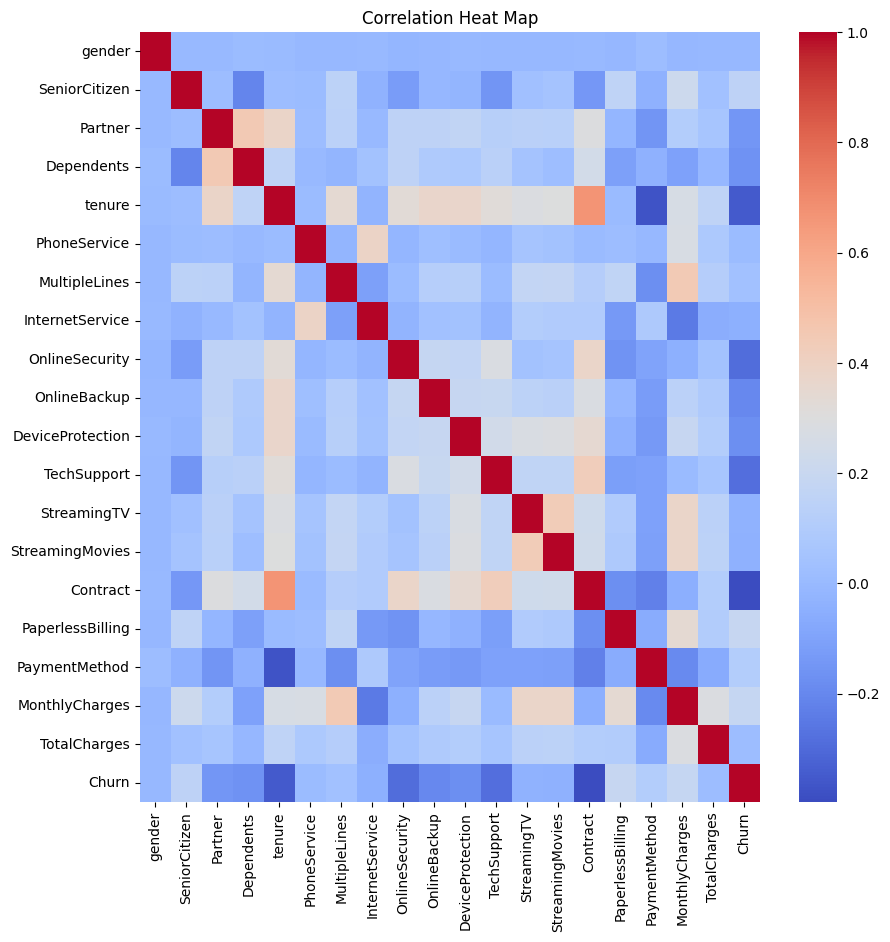

In [ ]:
#The heatmap is obtained for the correlated data
plt.figure(figsize=(10,10))
sns.heatmap(churn_corr, cmap = 'coolwarm')
plt.title('Correlation Heat Map')
plt.show()

#### DATASET PREPARATION FOR ML MODELLING


In [ ]:
# Import Standard Scaler from sklearn
from sklearn.preprocessing import StandardScaler
x = churn_data_t.iloc[:, :19].values # The first 19 columns(total dataset columns - customerID-Churn)
x = StandardScaler().fit_transform(x) # Standard scaler is used to standardize the data
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.13176632, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.38773977, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.51731743, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.14221613, -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.23297901, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.4723266 ,  1.13801338]])

#### DATA SET FOR PCA

In [ ]:
#PCA
p = x.copy()
from sklearn.decomposition import PCA
components = 9 #from SPSS 95% confidence interval

DR = PCA(n_components=components) # defining number of componets for Dimentional Reduction, which was obtained by doing SPSS
p_DR = DR.fit_transform(p)

churn_DR = DR.inverse_transform(p_DR)[:, :components]

#### MODEL TRAINING(WITHOUT PCA)

In [ ]:
y = churn_data_t['Churn'].values # Defining the target variable

In [ ]:
# Importing Train Test Split from Sklearn and training the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

In [ ]:
# The dimensions of the model is displayed
print(X_train.shape)
print(X_test.shape)

(5282, 19)
(1761, 19)


#### MODEL TRAINING(WITH PCA)

In [ ]:
# Training the model with PCA dataset
P_train, P_test, q_train, q_test = train_test_split(churn_DR, y, test_size=0.25, random_state=3)

#### PERFORMANCE FUNCTION

In [ ]:
# Required Libraries are imported to obtain performance scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


In [ ]:
# A Function is defined to give the performance attributes of the data
def performance_metrics(y_pred):
    print("Precision : ", round(precision_score(Y_test, y_pred, average = 'micro'),4)) # calculates precision
    print("Recall : ", round(recall_score(Y_test, y_pred, average = 'micro'),4)) # calculates Recall
    print("Accuracy : ", round(accuracy_score(Y_test, y_pred),4)) # calculates Accuracy
    print("F1 Score : ", round(f1_score(Y_test, y_pred, average = 'micro'),4))# # calculates f1 score
    cm = confusion_matrix(Y_test, y_pred) # create confusion matrix for the model
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(Y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Churn-NO', 'Churn-YES']) # creates confusion matrix plot
    cm.plot()



> ## ***MACHINE LEARNING MODELS (WITHOUT PCA)***




#### LOGISTIC REGRESSION

In [ ]:
# LogisticRegression without PCA
from sklearn.linear_model import LogisticRegression
churn_pred_LR = LogisticRegression() # dependent value prediction
churn_pred_LR.fit(X_train, Y_train) # Model fitting

LogisticRegression()

In [ ]:
y_pred_LR = churn_pred_LR.predict(X_test) #predict the data by passing the testing data
y_pred_LR_p = churn_pred_LR.predict_proba(X_test)[:, 1] # calculate the probabilities for ROC

Precision :  0.8171
Recall :  0.8171
Accuracy :  0.8171
F1 Score :  0.8171

 [[1194  110]
 [ 212  245]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1304
           1       0.69      0.54      0.60       457

    accuracy                           0.82      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.81      0.82      0.81      1761

******************************************************



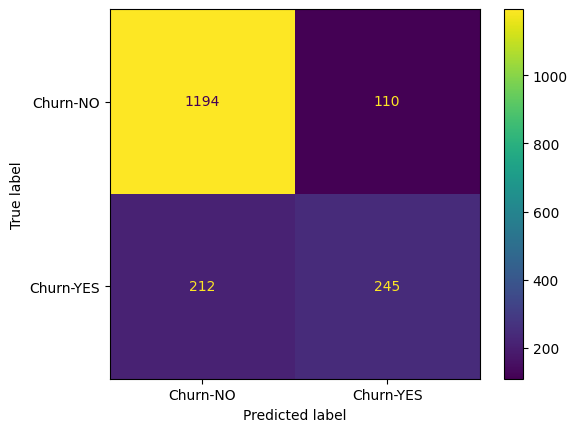

In [ ]:
performance_metrics(y_pred_LR) # Performance for Logistic Regression model without PCA

#### GRADIENT BOOSTING CLASSIFIER

In [ ]:
# Importing GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
churn_pred_GB = GradientBoostingClassifier() # predicting the dependent values using GBC
churn_pred_GB.fit(X_train, Y_train) # Fitting the model

GradientBoostingClassifier()

In [ ]:
y_pred_GB = churn_pred_GB.predict(X_test)  #predict the data by passing the testing data
y_pred_GB_p = churn_pred_GB.predict_proba(X_test)[:, 1] # calculate prob for GB

Precision :  0.8081
Recall :  0.8081
Accuracy :  0.8081
F1 Score :  0.8081

 [[1201  103]
 [ 235  222]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1304
           1       0.68      0.49      0.57       457

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761

******************************************************



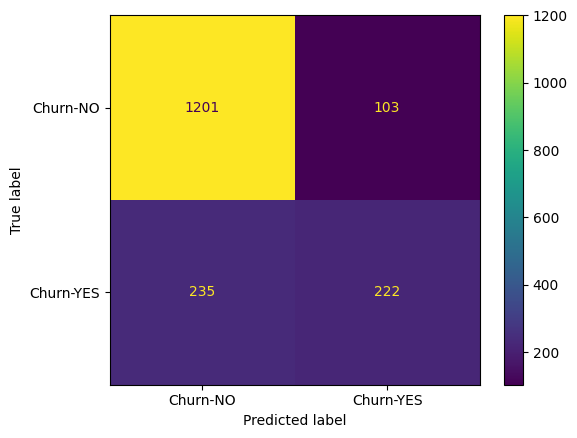

In [ ]:
performance_metrics(y_pred_GB) # Performance after gradient boosting without PCA

#### RANDOM FOREST

In [ ]:
# Importing RandomForestClassifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
churn_pred_RF = RandomForestClassifier() # dependent value prediction using RFC
churn_pred_RF.fit(X_train, Y_train) # model fitting

RandomForestClassifier()

In [ ]:
y_pred_RF = churn_pred_RF.predict(X_test) # predicted values for random forest without PCA
y_pred_RF_p = churn_pred_RF.predict_proba(X_test)[:, 1] # calculate the prob of target variable

Precision :  0.8018
Recall :  0.8018
Accuracy :  0.8018
F1 Score :  0.8018

 [[1197  107]
 [ 242  215]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1304
           1       0.67      0.47      0.55       457

    accuracy                           0.80      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.79      0.80      0.79      1761

******************************************************



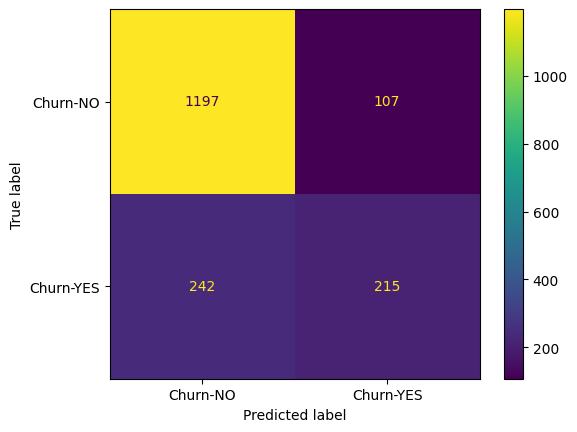

In [ ]:
performance_metrics(y_pred_RF) # Performance after RFC (Random forest Classification) without PCA

### NEURAL NETWORK

In [ ]:
import tensorflow as tf # import packages for neural network model
from tensorflow import keras

In [ ]:
churn_pred_NN = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid as activation function for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# time for compilation of neural net.
churn_pred_NN.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit this model for churn rate and train it with 60 epochs
churn_pred_NN.fit(X_train,Y_train,epochs=60)

Epoch 1/60
166/166 [==============================] - 2s 3ms/step - loss: 0.5194 - accuracy: 0.7467
Epoch 2/60
166/166 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7855
Epoch 3/60
166/166 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7919
Epoch 4/60
166/166 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7950
Epoch 5/60
166/166 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.7974
Epoch 6/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8035
Epoch 7/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8037
Epoch 8/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8095
Epoch 9/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8086
Epoch 10/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8099

In [ ]:
# evalute the model
churn_pred_NN.evaluate(X_test,Y_test)

56/56 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.7939


[0.4432544410228729, 0.7938671112060547]

In [ ]:
y_pred_NN_p = churn_pred_NN.predict(X_test) # predict the target variable
# convert the target variable which is in th eform of the probability of true positive to the actual classification value
y_pred_NN = []
for i in y_pred_NN_p:
    if i>0.5:
        y_pred_NN.append(1) # greater than 0.5 implies that the value is churn yes
    else:
        y_pred_NN.append(0)

56/56 [==============================] - 0s 2ms/step


Precision :  0.7939
Recall :  0.7939
Accuracy :  0.7939
F1 Score :  0.7939

 [[1159  145]
 [ 218  239]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1304
           1       0.62      0.52      0.57       457

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761

******************************************************



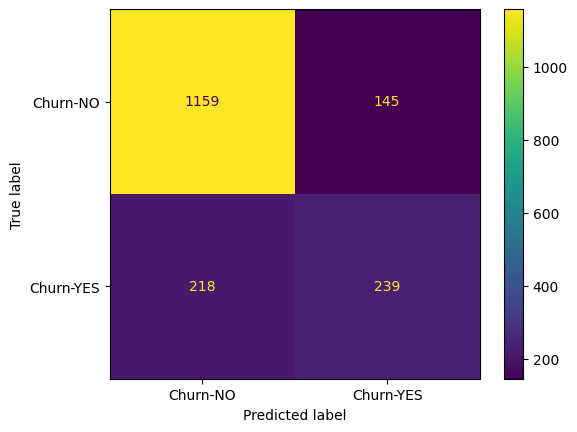

In [ ]:
performance_metrics(y_pred_NN)

 > ## ***MACHINE LEARNING MODELS (WITH PCA)***



#### LOGISTIC REGRESSION

In [ ]:
# LogisticRegression with PCA
churn_pred_LR_PCA = LogisticRegression() # dependent value prediction
churn_pred_LR_PCA.fit(P_train, q_train) # Model fitting

LogisticRegression()

In [ ]:
q_pred_LR = churn_pred_LR_PCA.predict(P_test) # predicted values for Logistic Regression with PCA
q_pred_LR_p = churn_pred_LR_PCA.predict_proba(P_test)[:, 1] # calculates the probability for ROC-Curve

Precision :  0.7871
Recall :  0.7871
Accuracy :  0.7871
F1 Score :  0.7871

 [[1179  125]
 [ 250  207]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1304
           1       0.62      0.45      0.52       457

    accuracy                           0.79      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.79      0.78      1761

******************************************************



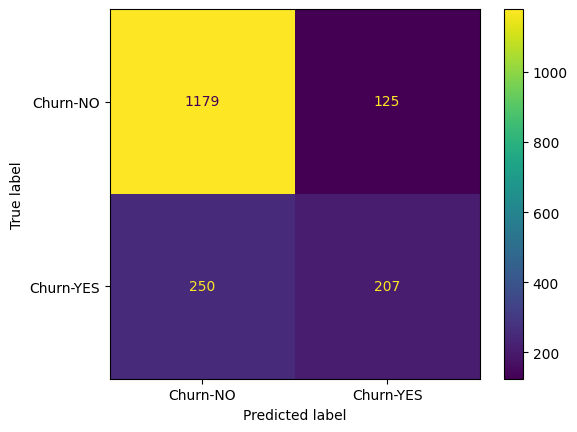

In [ ]:
performance_metrics(q_pred_LR) #Performance of Logistic regression with PCA

#### GRADIENT BOOSTING CLASSIFIER

In [ ]:
# importing GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
churn_pred_GB_PCA = GradientBoostingClassifier() # predicting the dependent values using GBC
churn_pred_GB_PCA.fit(P_train, q_train) # Model fitting

GradientBoostingClassifier()

Precision :  0.7978
Recall :  0.7978
Accuracy :  0.7978
F1 Score :  0.7978

 [[1191  113]
 [ 243  214]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1304
           1       0.65      0.47      0.55       457

    accuracy                           0.80      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.80      0.79      1761

******************************************************



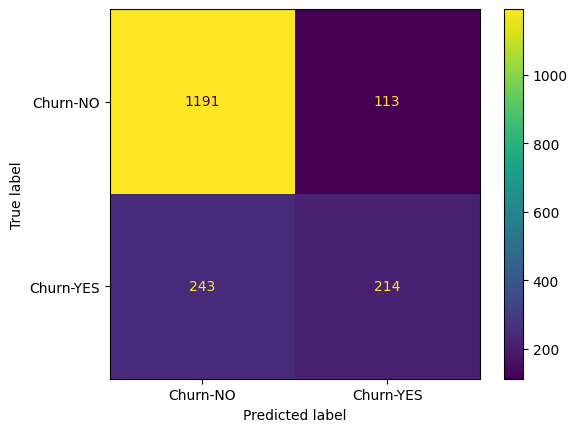

In [ ]:
q_pred_GB = churn_pred_GB_PCA.predict(P_test) # predict the target variable
q_pred_GB_p = churn_pred_GB_PCA.predict_proba(P_test)[:, 1]
performance_metrics(q_pred_GB) # Performance after gradient boosting with PCA

#### RANDOM FOREST

In [ ]:
# Importing RandomForestClassifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
churn_pred_RF_PCA = RandomForestClassifier() # dependent value prediction using RFC
churn_pred_RF_PCA.fit(P_train, q_train) # model fitting

RandomForestClassifier()

Precision :  0.7933
Recall :  0.7933
Accuracy :  0.7933
F1 Score :  0.7933

 [[1190  114]
 [ 250  207]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1304
           1       0.64      0.45      0.53       457

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.78      0.79      0.78      1761

******************************************************



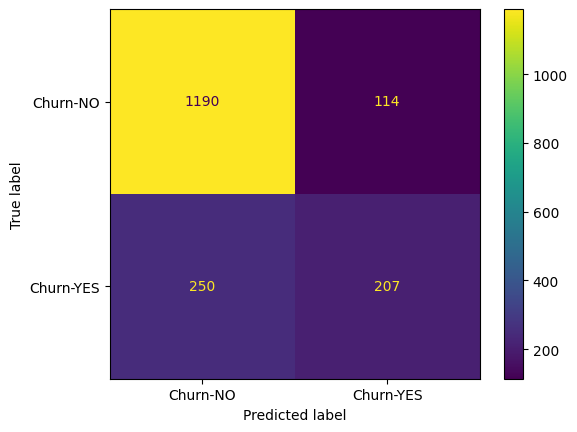

In [ ]:
q_pred_RF = churn_pred_RF_PCA.predict(P_test) # predicted values for random forest with PCA
q_pred_RF = churn_pred_RF_PCA.predict(P_test)
q_pred_RF_p = churn_pred_RF_PCA.predict_proba(P_test)[:, 1]
performance_metrics(q_pred_RF) # Performance after RFC (Random forest Classification) with PCA

### Neural Networks

In [ ]:
churn_pred_NN_PCA = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(9,), activation='relu'), #relu is aactivation function
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# time for compilation of neural net.
churn_pred_NN_PCA.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) # the iteration shows the step loss, accuracy performance for each epoch.
# now we fit our model to training data and run for 60 epochs
churn_pred_NN_PCA.fit(P_train,q_train,epochs=60)

Epoch 1/60
166/166 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.7308
Epoch 2/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7630
Epoch 3/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7736
Epoch 4/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7796
Epoch 5/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7794
Epoch 6/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7811
Epoch 7/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7863
Epoch 8/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7857
Epoch 9/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7881
Epoch 10/60
166/166 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7872

In [ ]:
# evalute the model
churn_pred_NN_PCA.evaluate(P_test,q_test)

56/56 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7876


[0.4175993800163269, 0.7876206636428833]

In [ ]:
q_pred_NN_p = churn_pred_NN_PCA.predict(P_test)
# convert the probability values into the classification variables.
q_pred_NN = []
for i in q_pred_NN_p:
    if i>0.5:
        q_pred_NN.append(1)
    else:
        q_pred_NN.append(0)

56/56 [==============================] - 0s 2ms/step


Precision :  0.7876
Recall :  0.7876
Accuracy :  0.7876
F1 Score :  0.7876

 [[1176  128]
 [ 246  211]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1304
           1       0.62      0.46      0.53       457

    accuracy                           0.79      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.79      0.78      1761

******************************************************



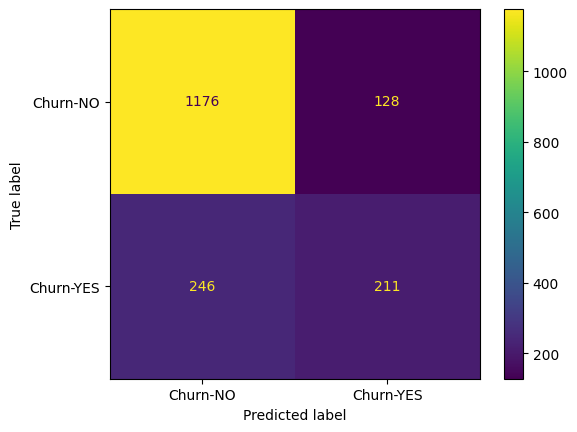

In [ ]:
performance_metrics(q_pred_NN)

## ROC-AUC

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score # library package to calculatethe AUC : area under the curve
auc_1 = np.round(roc_auc_score(Y_test,y_pred_LR_p),3) # Logistic regression without PCA
print("ROC-AUC for churn rate predicted with Logistic regression without PCA: {}".format(auc_1))
auc_2 = np.round(roc_auc_score(Y_test,y_pred_GB_p),3) # Gradient Boosting without PCA
print("ROC-AUC for churn rate predicted with Gradient Boosting without PCA: {}".format(auc_2))
auc_3 = np.round(roc_auc_score(Y_test,y_pred_RF_p),3) # Random Forest without PCA
print("ROC-AUC for churn rate predicted with Random Forest without PCA: {}".format(auc_3))
auc_4 = np.round(roc_auc_score(Y_test,y_pred_NN_p),3) # Neural Network without PCA
print("ROC-AUC for churn rate predicted with Neural Network without PCA: {}".format(auc_4))
print("------------------------------------------------")
auc_5 = np.round(roc_auc_score(q_test,q_pred_LR_p),3) # Logistic regresion with PCA
print("ROC-AUC for churn rate predicted with Logistic regression without: PCA {}".format(auc_5))
auc_6 = np.round(roc_auc_score(q_test,q_pred_GB_p),3) # Gradient Boosting with PCA
print("ROC-AUC for churn rate predicted with Gradient Boosting with PCA: {}".format(auc_6))
auc_7 = np.round(roc_auc_score(q_test,q_pred_RF_p),3) # Random Forest with PCA
print("ROC-AUC for churn rate predicted with Random Forest with PCA: {}".format(auc_7))
auc_8 = np.round(roc_auc_score(q_test, q_pred_NN_p),3) # Neural Network with PCA
print("ROC-AUC for churn rate predicted with Neural Network with PCA: {}".format(auc_8))

ROC-AUC for churn rate predicted with Logistic regression without PCA: 0.856
ROC-AUC for churn rate predicted with Gradient Boosting without PCA: 0.861
ROC-AUC for churn rate predicted with Random Forest without PCA: 0.83
ROC-AUC for churn rate predicted with Neural Network without PCA: 0.826
------------------------------------------------
ROC-AUC for churn rate predicted with Logistic regression without: PCA 0.837
ROC-AUC for churn rate predicted with Gradient Boosting with PCA: 0.847
ROC-AUC for churn rate predicted with Random Forest with PCA: 0.819
ROC-AUC for churn rate predicted with Neural Network with PCA: 0.841


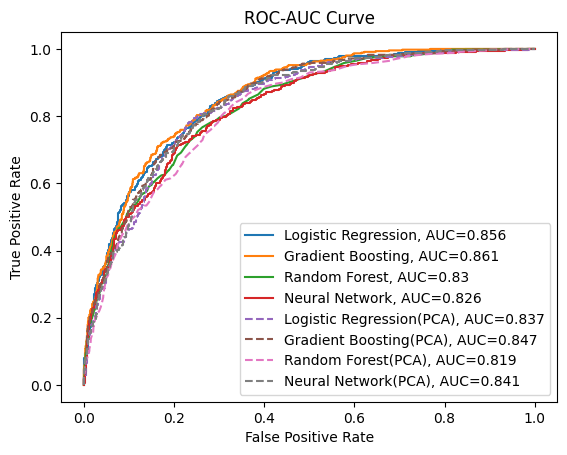

In [ ]:
from sklearn.metrics import roc_curve
# calculate false positive rate(frp) and true positive rate(tpr)
fpr_1,tpr_1, _ = roc_curve(Y_test,y_pred_LR_p) # Logistic regression without PCA
fpr_2,tpr_2, _ = roc_curve(Y_test,y_pred_GB_p) # Gradient Boosting without PCA
fpr_3,tpr_3, _ = roc_curve(Y_test,y_pred_RF_p) # Random Forest without PCA
fpr_4,tpr_4, _ = roc_curve(Y_test,y_pred_NN_p) # Neural Network without PCA
fpr_5,tpr_5, _ = roc_curve(q_test,q_pred_LR_p) # Logistic regresion with PCA
fpr_6,tpr_6, _ = roc_curve(q_test,q_pred_GB_p) # Gradient Boosting with PCA
fpr_7,tpr_7, _ = roc_curve(q_test,q_pred_RF_p) # Random Forest with PCA
fpr_8,tpr_8, _ = roc_curve(q_test, q_pred_NN_p) # Neural Network with PCA

# To plot tha ROC curve of all the models used for churn data prediction

plt.plot(fpr_1,tpr_1,label="Logistic Regression, AUC="+str(auc_1))
plt.plot(fpr_2,tpr_2,label="Gradient Boosting, AUC="+str(auc_2))
plt.plot(fpr_3,tpr_3,label="Random Forest, AUC="+str(auc_3))
plt.plot(fpr_4,tpr_4,label="Neural Network, AUC="+str(auc_4))
plt.plot(fpr_5,tpr_5,label="Logistic Regression(PCA), AUC="+str(auc_5),linestyle='dashed')
plt.plot(fpr_6,tpr_6,label="Gradient Boosting(PCA), AUC="+str(auc_6),linestyle='dashed')
plt.plot(fpr_7,tpr_7,label="Random Forest(PCA), AUC="+str(auc_7),linestyle='dashed')
plt.plot(fpr_8,tpr_8,label="Neural Network(PCA), AUC="+str(auc_8),linestyle='dashed')
plt.title("ROC-AUC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

### Precision-Recall

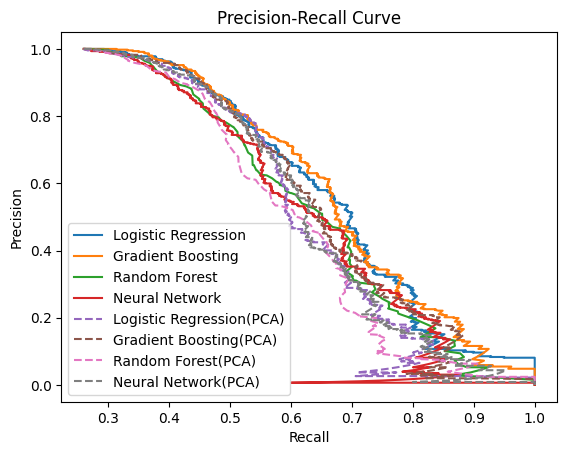

In [ ]:
from sklearn.metrics import precision_recall_curve
# p = Precision, r = recall, t = threshold
p_1, r_1, t_1 = precision_recall_curve(Y_test,y_pred_LR_p) # Logistic regression without PCA
p_2, r_2, t_2 = precision_recall_curve(Y_test,y_pred_GB_p) # Gradient Boosting without PCA
p_3, r_3, t_3 = precision_recall_curve(Y_test,y_pred_RF_p) # Random Forest without PCA
p_4, r_4, t_4 = precision_recall_curve(Y_test,y_pred_NN_p) # Neural Network without PCA
p_5, r_5, t_5 = precision_recall_curve(q_test,q_pred_LR_p) # Logistic regresion with PCA
p_6, r_6, t_6 = precision_recall_curve(q_test,q_pred_GB_p) # Gradient Boosting with PCA
p_7, r_7, t_7 = precision_recall_curve(q_test,q_pred_RF_p) # Random Forest with PCA
p_8, r_8, t_8 = precision_recall_curve(q_test, q_pred_NN_p) # Neural Network with PCA

# plot precision and recall curve

plt.plot(p_1, r_1,label="Logistic Regression")
plt.plot(p_2, r_2,label="Gradient Boosting")
plt.plot(p_3, r_3,label="Random Forest")
plt.plot(p_4, r_4,label="Neural Network")
plt.plot(p_5, r_5,label="Logistic Regression(PCA)",linestyle='dashed')
plt.plot(p_6, r_6,label="Gradient Boosting(PCA)",linestyle='dashed')
plt.plot(p_7, r_7,label="Random Forest(PCA)",linestyle='dashed')
plt.plot(p_8, r_8,label="Neural Network(PCA)",linestyle='dashed')
plt.legend()
plt.title("Precision-Recall Curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [ ]:
# calculating the area under the curve for the precision recall curve:
from sklearn.metrics import auc
pauc_1 = np.round(auc(r_1,p_1),3) # Logistic regression without PCA
print("Precision-Recall AUC for churn rate predicted with Logistic regression without PCA: {}".format(pauc_1))
pauc_2 = np.round(auc(r_2,p_2),3) # Gradient Boosting without PCA
print("Precision-Recall AUC for churn rate predicted with Gradient Boosting without PCA: {}".format(pauc_2))
pauc_3 = np.round(auc(r_3,p_3),3) # Random Forest without PCA
print("Precision-Recall AUC for churn rate predicted with Random Forest without PCA: {}".format(pauc_3))
pauc_4 = np.round(auc(r_4,p_4),3) # Neural Network without PCA
print("Precision-Recall AUC for churn rate predicted with Neural Network without PCA: {}".format(pauc_4))
print("------------------------------------------------")
pauc_5 = np.round(auc(r_5,p_5),3) # Logistic regresion with PCA
print("Precision-Recall AUC for churn rate predicted with Logistic regression without: PCA {}".format(pauc_5))
pauc_6 = np.round(auc(r_6,p_6),3) # Gradient Boosting with PCA
print("Precision-Recall AUC for churn rate predicted with Gradient Boosting with PCA: {}".format(pauc_6))
pauc_7 = np.round(auc(r_7,p_7),3) # Random Forest with PCA
print("Precision-Recall AUC for churn rate predicted with Random Forest with PCA: {}".format(pauc_7))
pauc_8 = np.round(auc(r_8,p_8),3) # Neural Network with PCA
print("Precision-Recall AUC for churn rate predicted with Neural Network with PCA: {}".format(pauc_8))

Precision-Recall AUC for churn rate predicted with Logistic regression without PCA: 0.676
Precision-Recall AUC for churn rate predicted with Gradient Boosting without PCA: 0.684
Precision-Recall AUC for churn rate predicted with Random Forest without PCA: 0.636
Precision-Recall AUC for churn rate predicted with Neural Network without PCA: 0.628
------------------------------------------------
Precision-Recall AUC for churn rate predicted with Logistic regression without: PCA 0.622
Precision-Recall AUC for churn rate predicted with Gradient Boosting with PCA: 0.65
Precision-Recall AUC for churn rate predicted with Random Forest with PCA: 0.603
Precision-Recall AUC for churn rate predicted with Neural Network with PCA: 0.633
